In [78]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import RegularGridInterpolator as RGI
from scipy.interpolate import LinearNDInterpolator as LNDI
from scipy.spatial import Delaunay
from scipy.optimize import fsolve

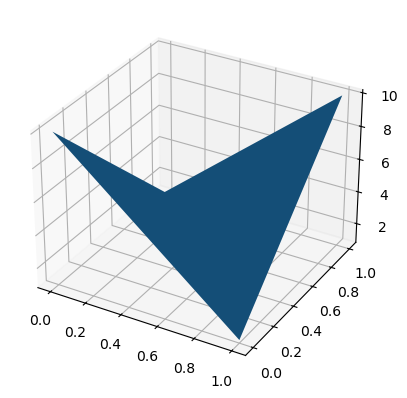

In [50]:
x = np.array([0.0, 1.0])
y = np.array([0.0, 1.0])
z = np.array([[10.0, 1.0],[1.0, 10.0]])

X,Y = np.meshgrid(x,y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(111)
ax.plot_surface(X,Y,z)
#ax.contourf(X,Y,z,30)

[[3 2 0]
 [1 3 0]]
0.12081686475999999


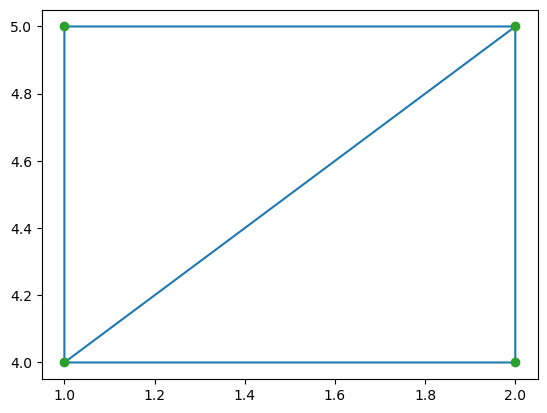

In [80]:
points = np.array([[1., 4], [2, 4], [1, 5], [2,5]])
c = np.array([0.0346013886, 0.2522880, 0.000192789, 0.243696316])
h = np.array([0.78555, 0.58045, 0.84100, 0.515326])

tri = Delaunay(points)
print(tri.simplices)

cI2 = LNDI(points, c)
hI2 = LNDI(points, h)

print(cI2(1.4, 4.1))

plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')

In [61]:
c = np.array([0.0346013886, 0.2522880, 0.000192789, 0.243696316])
h = np.array([0.78555, 0.58045, 0.84100, 0.515326])

cA = c[0]
cB = c[1]
cC = c[2]
cD = c[3]

hA = h[0]
hB = h[1]
hC = h[2]
hD = h[3]

LA = 1
LB = 2
LC = 1
LD = 2

tA = 4
tB = 4
tC = 5
tD = 5

def c(L,t):
    return cA + (L-LA)*(cB-cA)/(LB-LA) + (t-tA)*(cC-cA)/(tC-tA)
    #return cD + (t-tD)*(cB-cD)/(tB-tD) + (L-LD)*(cC-cD)/(LC-LD)
def h(L,t):
    return hA + (L-LA)*(hB-hA)/(LB-LA) + (t-tA)*(hC-hA)/(tC-tA)
    #return hD + (t-tD)*(hB-hD)/(tB-tD) + (L-LD)*(hC-hD)/(LC-LD)

c0 = 0.094995
h0 = 0.77964

def F(Lt):
    L = Lt[0]
    t = Lt[1]
    return np.array([c(L,t)-c0, h(L,t)-h0])

Ltguess = np.array([0.5, 0.5])
Lt = fsolve(F, Ltguess)
L = Lt[0]
t = Lt[1]

print(L,t)


1.6273978494565127 6.21405408338198


In [60]:
L1,t1 = 1.35919171770371, 4.1459461416461
L2,t2 = 1.6273978494565127 6.21405408338198

In [77]:
tri.find_simplex([1.2, 4.6])

array(0, dtype=int32)

In [81]:
LNDI?

Init signature: LNDI(points, values, fill_value=nan, rescale=False)
Docstring:     
LinearNDInterpolator(points, values, fill_value=np.nan, rescale=False)

Piecewise linear interpolator in N > 1 dimensions.

.. versionadded:: 0.9

Methods
-------
__call__

Parameters
----------
points : ndarray of floats, shape (npoints, ndims); or Delaunay
    2-D array of data point coordinates, or a precomputed Delaunay triangulation.
values : ndarray of float or complex, shape (npoints, ...), optional
    N-D array of data values at `points`.  The length of `values` along the
    first axis must be equal to the length of `points`. Unlike some
    interpolators, the interpolation axis cannot be changed.
fill_value : float, optional
    Value used to fill in for requested points outside of the
    convex hull of the input points.  If not provided, then
    the default is ``nan``.
rescale : bool, optional
    Rescale points to unit cube before performing interpolation.
    This is useful if some of th

In [75]:
tri.find_simplex?

Signature: tri.find_simplex(xi, bruteforce=False, tol=None)
Docstring:
find_simplex(self, xi, bruteforce=False, tol=None)

Find the simplices containing the given points.

Parameters
----------
tri : DelaunayInfo
    Delaunay triangulation
xi : ndarray of double, shape (..., ndim)
    Points to locate
bruteforce : bool, optional
    Whether to only perform a brute-force search
tol : float, optional
    Tolerance allowed in the inside-triangle check.
    Default is ``100*eps``.

Returns
-------
i : ndarray of int, same shape as `xi`
    Indices of simplices containing each point.
    Points outside the triangulation get the value -1.

Notes
-----
This uses an algorithm adapted from Qhull's ``qh_findbestfacet``,
which makes use of the connection between a convex hull and a
Delaunay triangulation. After finding the simplex closest to
the point in N+1 dimensions, the algorithm falls back to
directed search in N dimensions.
Type:      method